In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df  = pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [203]:
df.skew()

cgpa                   -0.014530
placement_exam_marks    0.835642
placed                  0.044077
dtype: float64

In [204]:
df["placement_exam_marks"]

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 1000, dtype: float64

In [205]:
iqr = -np.percentile(df["placement_exam_marks"],25) + np.percentile(df["placement_exam_marks"],75)
max = np.percentile(df["placement_exam_marks"],75)+1.5*iqr
min = np.percentile(df["placement_exam_marks"],25)-1.5*iqr

In [206]:
iqr,max,min

(np.float64(27.0), np.float64(84.5), np.float64(-23.5))

In [207]:
df[df["placement_exam_marks"]>max]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [208]:
#TRimming

new_df = df[df["placement_exam_marks"]>max]
new_df

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

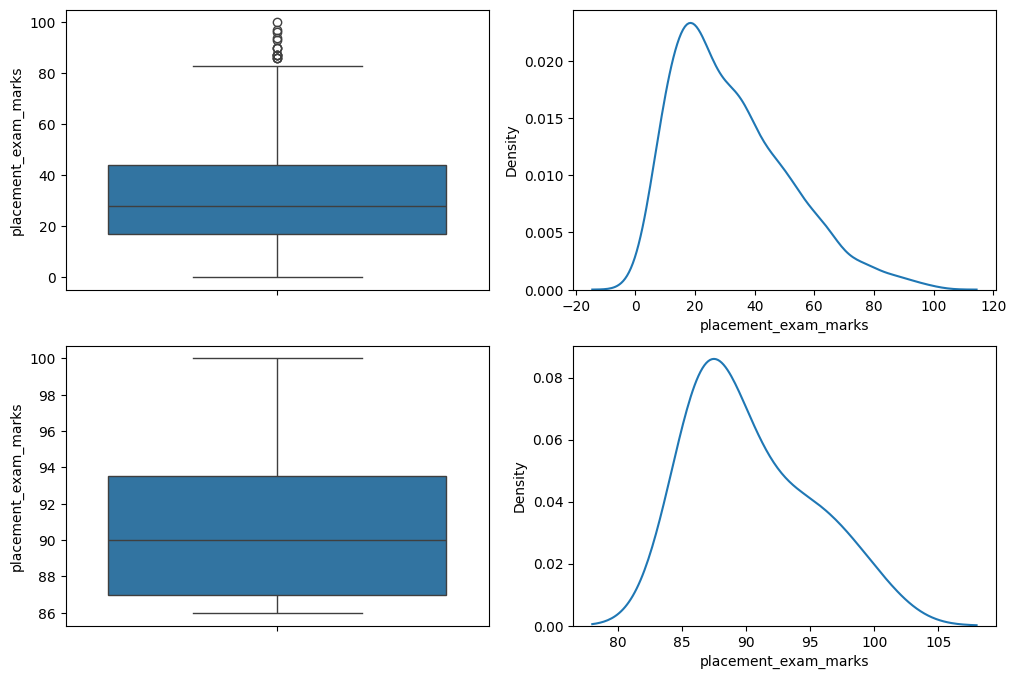

In [209]:

plt.figure(figsize=(12,8))

ax1= plt.subplot(2,2,1)
ax2= plt.subplot(2,2,2)
ax3= plt.subplot(2,2,3)
ax4= plt.subplot(2,2,4)

sns.boxplot(df["placement_exam_marks"],ax=ax1)
sns.kdeplot(df["placement_exam_marks"],ax=ax2,)
sns.boxplot(new_df["placement_exam_marks"],ax=ax3)
sns.kdeplot(new_df["placement_exam_marks"],ax=ax4)

In [213]:
 #capping
new_df_copy = df.copy()
new_df_copy["placement_exam_marks"] =  np.where(df['placement_exam_marks'] > max, max 
         ,np.where(df["placement_exam_marks"]<min,min,df["placement_exam_marks"])
)

In [215]:
new_df_copy

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

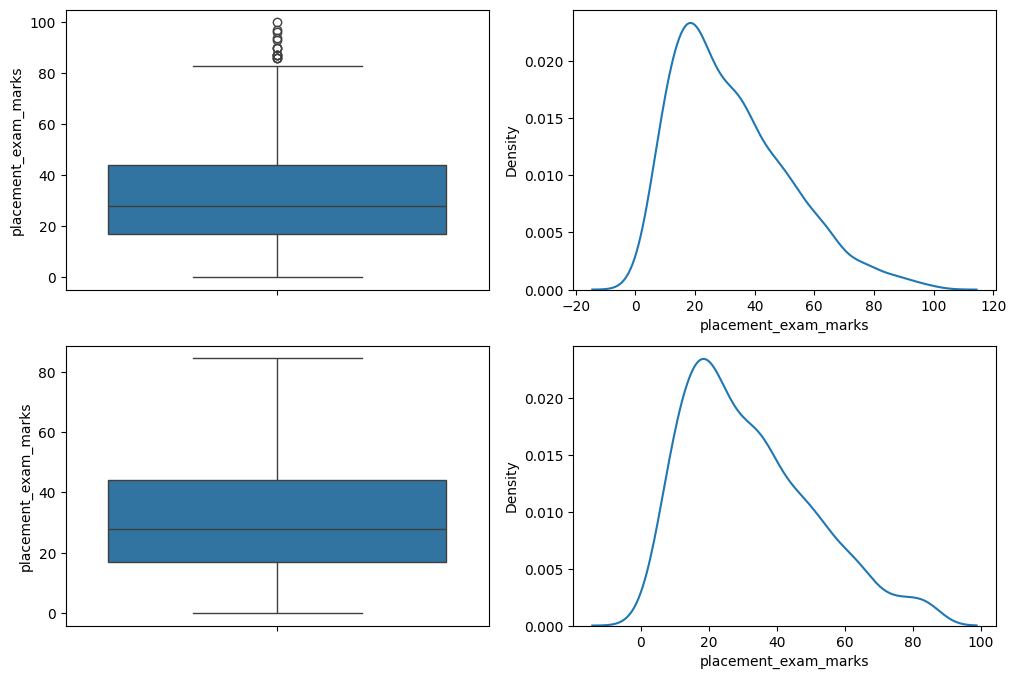

In [216]:
plt.figure(figsize=(12,8))

ax1= plt.subplot(2,2,1)
ax2= plt.subplot(2,2,2)
ax3= plt.subplot(2,2,3)
ax4= plt.subplot(2,2,4)

sns.boxplot(df["placement_exam_marks"],ax=ax1)
sns.kdeplot(df["placement_exam_marks"],ax=ax2,)
sns.boxplot(new_df_copy["placement_exam_marks"],ax=ax3)
sns.kdeplot(new_df_copy["placement_exam_marks"],ax=ax4)